In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AAPL", "GOOGL", "BRK.B", "JNJ"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AAPL                                  BRK.B  \
                             open high     low   close    volume    open   
2020-10-09 00:00:00-04:00  115.28  117  114.92  116.98  86041259  215.88   

                                                                GOOGL  \
                               high     low   close   volume     open   
2020-10-09 00:00:00-04:00  216.2924  214.16  215.62  4903157  1492.86   

                                                               JNJ          \
                              high   low    close   volume    open    high   
2020-10-09 00:00:00-04:00  1511.85  1487  1510.45  1368884  149.67  151.48   

                                                     
                               low   close   volume  
2020-10-09 00:00:00-04:00  149.445  150.93  7666967

In [6]:
# Format start and end dates as ISO format for 5 year period
start = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-08-01", tz="America/New_York").isoformat()

In [7]:
# Get closing prices
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(5)

AAPL                                      BRK.B  \
                             open    high      low   close    volume    open   
2015-01-02 00:00:00-05:00  111.39  111.44  107.350  109.30  47045497  151.50   
2015-01-05 00:00:00-05:00  108.29  108.65  105.410  106.25  50146623  148.81   
2015-01-06 00:00:00-05:00  106.56  107.43  104.630  106.23  59441540  147.64   
2015-01-07 00:00:00-05:00  107.20  108.20  106.695  107.75  34452408  147.94   
2015-01-08 00:00:00-05:00  109.23  112.15  108.700  111.87  50255019  150.60   

                                                                  GOOGL  \
                               high      low   close     volume    open   
2015-01-02 00:00:00-05:00  151.6000  148.500  149.13  2463511.0  532.60   
2015-01-05 00:00:00-05:00  149.0000  146.780  147.07  3261548.0  527.01   
2015-01-06 00:00:00-05:00  148.5300  146.111  146.70  3297957.0  520.50   
2015-01-07 00:00:00-05:00  149.1399  147.650  148.81  2696224.0  510.95   
2015-01-08 00:00:00-05:00  151.3300  150.510  151.25  3442794.0  501.51   

                                                                 JNJ          \
                               high     low   close   volume    open    high   
2015-01-02 00:00:00-05:00  535.8000  527.88  529.55   829538  105.05  105.55   
2015-01-05 00:00:00-05:00  527.9899  517.75  519.24  1300076  104.48  104.73   
2015-01-06 00:00:00-05:00  521.2100  505.55  506.89  1878228  104.34  104.99   
2015-01-07 00:00:00-05:00  511.4900  503.65  505.15  1683477  103.91  105.83   
2015-01-08 00:00:00-05:00  507.5000  495.02  506.85  2500177  106.06  106.49   

                                                     
                               low   close   volume  
2015-01-02 00:00:00-05:00  104.130  104.49  4238082  
2015-01-05 00:00:00-05:00  103.682  103.85  6135505  
2015-01-06 00:00:00-05:00  102.940  103.25  6174712  
2015-01-07 00:00:00-05:00  103.810  105.56  6744677  
2015-01-08 00:00:00-05:00  105.750  106.38  7432752

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AAPL"] = df_portfolio_year["AAPL"]["close"]
df_closing_prices["GOOGL"] = df_portfolio_year["GOOGL"]["close"]
df_closing_prices["BRK.B"] = df_portfolio_year["BRK.B"]["close"]
df_closing_prices["JNJ"] = df_portfolio_year["JNJ"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,AAPL,GOOGL,BRK.B,JNJ
2015-01-02,109.30,529.55,149.13,104.49
2015-01-05,106.25,519.24,147.07,103.85
2015-01-06,106.23,506.89,146.70,103.25
2015-01-07,107.75,505.15,148.81,105.56
2015-01-08,111.87,506.85,151.25,106.38
2015-01-09,112.00,500.66,149.53,104.96
2015-01-12,109.24,497.07,148.33,104.60
2015-01-13,110.22,501.76,148.54,104.74
2015-01-14,109.79,505.80,147.77,103.98
2015-01-15,106.83,504.09,147.60,102.54


In [9]:
df_daily_return = df_closing_prices.pct_change()
df_daily_return = df_daily_return.dropna()
df_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ
2015-01-05,-0.027905,-0.019469,-0.013813,-0.006125
2015-01-06,-0.000188,-0.023785,-0.002516,-0.005778
2015-01-07,0.014309,-0.003433,0.014383,0.022373
2015-01-08,0.038237,0.003365,0.016397,0.007768
2015-01-09,0.001162,-0.012213,-0.011372,-0.013348


In [10]:
df_daily_return.dtypes

AAPL     float64
GOOGL    float64
BRK.B    float64
JNJ      float64
dtype: object

In [11]:
portfolio_std = df_daily_return.std().sort_values()
portfolio_std

JNJ      0.012245
BRK.B    0.013185
GOOGL    0.016796
AAPL     0.018239
dtype: float64

In [12]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.25, 0.25, 0.25, 0.25]

portfolios_returns = df_daily_return.dot(weights)
portfolios_returns.head()

2015-01-05   -0.016828
2015-01-06   -0.008067
2015-01-07    0.011908
2015-01-08    0.016442
2015-01-09   -0.008943
dtype: float64

In [13]:
#ADD TESLA stock in the portfolio
tesla_ticker = ["TSLA"]
# Get closing prices
df_tesla = alpaca.get_barset(
    tesla_ticker,
    timeframe,
    start = start,
    end = end
).df
tesla_closing_prices = df_tesla["TSLA"] = df_tesla["TSLA"]["close"]
# Drop the time component of the date
tesla_closing_prices.index = tesla_closing_prices.index.date
tesla_daily_return = tesla_closing_prices.pct_change().dropna()
all_closing_prices = pd.concat([portfolios_returns, tesla_daily_return], axis="columns", join="inner")
# Display sample data
tesla_daily_return.head(5)

2015-01-05   -0.041881
2015-01-06    0.005619
2015-01-07   -0.001799
2015-01-08   -0.001233
2015-01-09   -0.018760
Name: close, dtype: float64

In [14]:
wtesla_daily_return = pd.concat([df_daily_return, tesla_daily_return], axis="columns", join="inner")
wtesla_daily_return = wtesla_daily_return.rename(columns= {"close" : "TSLA"})
wtesla_daily_return.head()

,AAPL,GOOGL,BRK.B,JNJ,TSLA
2015-01-05,-0.027905,-0.019469,-0.013813,-0.006125,-0.041881
2015-01-06,-0.000188,-0.023785,-0.002516,-0.005778,0.005619
2015-01-07,0.014309,-0.003433,0.014383,0.022373,-0.001799
2015-01-08,0.038237,0.003365,0.016397,0.007768,-0.001233
2015-01-09,0.001162,-0.012213,-0.011372,-0.013348,-0.018760


In [15]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

wtesla_portfolios_returns = wtesla_daily_return.dot(weights)
wtesla_portfolios_returns.head()

2015-01-05   -0.021839
2015-01-06   -0.005330
2015-01-07    0.009167
2015-01-08    0.012907
2015-01-09   -0.010906
dtype: float64

In [16]:
# Open S&P 500 historical prices
file_path = Path("Resources\S&P500_5years.csv")
sp500 = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-04,2110.600098,2114.590088,2096.979980,2102.310059,2102.310059,4078870000
2015-11-05,2101.679932,2108.780029,2090.409912,2099.929932,2099.929932,4051890000
2015-11-06,2098.600098,2101.909912,2083.739990,2099.199951,2099.199951,4369020000
2015-11-09,2096.560059,2096.560059,2068.239990,2078.580078,2078.580078,3882350000
2015-11-10,2077.189941,2083.669922,2069.909912,2081.719971,2081.719971,3821440000


In [17]:
# Fetch the closing prices of S&P500
sp500_closing_prices = pd.DataFrame()
sp500_closing_prices["S&P500"] = sp500["Close"]
sp500_closing_prices_daily = sp500_closing_prices.pct_change().dropna().copy()

In [18]:
#Concatenate STOCKS & INDEX
all_portfolio = pd.concat([portfolios_returns, wtesla_portfolios_returns, sp500_closing_prices_daily], axis="columns", join="inner")
all_portfolio_concat = all_portfolio.rename(columns= {0 : "wo_Tesla", 1 : "w_Tesla"})
all_portfolio_concat.tail()

,wo_Tesla,w_Tesla,S&P500
2020-07-27,0.004614,0.021260,0.007395
2020-07-28,-0.005934,-0.013132,-0.006473
2020-07-29,0.010235,0.011528,0.012428
2020-07-30,0.003377,0.001026,-0.003750
2020-07-31,0.018317,0.007201,0.007671


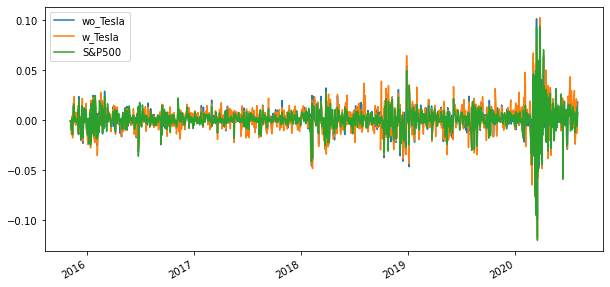

In [19]:
all_portfolio_concat.plot(figsize=(10,5))

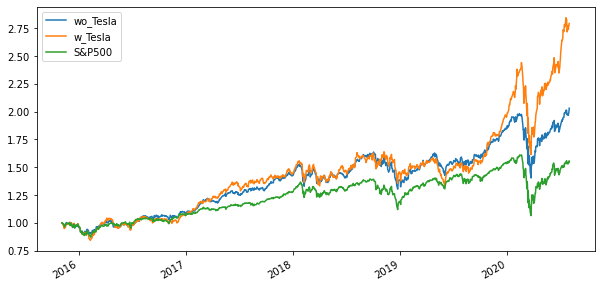

In [20]:
df_cumulative = (1 + all_portfolio_concat).cumprod()
df_cumulative.plot(figsize=(10, 5))

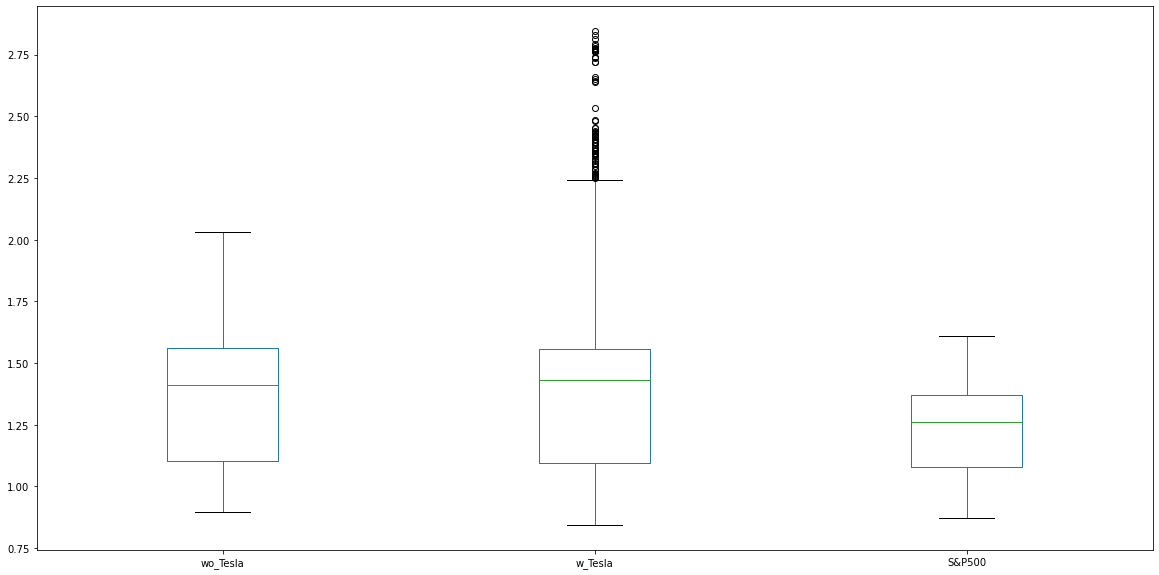

In [21]:
df_cumulative.plot.box(figsize=(20,10))

In [22]:
portfolio_std = all_portfolio_concat.std().sort_values()
portfolio_std

S&P500      0.012160
wo_Tesla    0.012480
w_Tesla     0.014173
dtype: float64

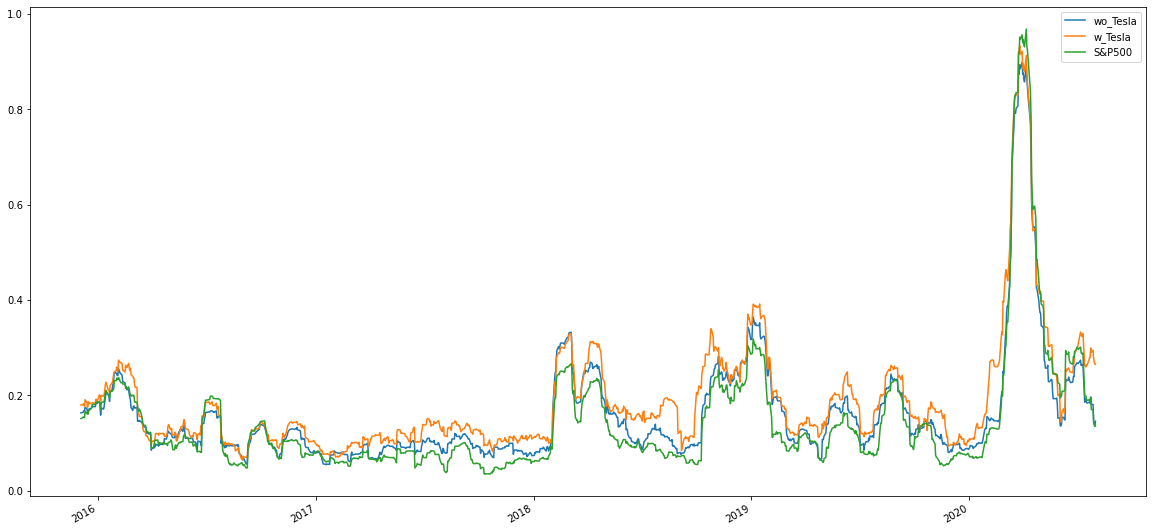

In [23]:
annualized_std = all_portfolio_concat * np.sqrt(252)
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

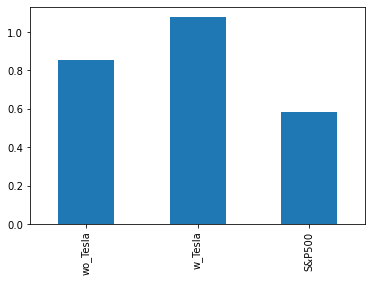

In [24]:
sharpe_ratios = (all_portfolio_concat.mean() * 252) / (all_portfolio_concat.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")